In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


Lets pick up where we left.

In [3]:
medical = pd.read_pickle("data/medical.p")

In [4]:
# The file includes socio-demographic data, including 
# health insurance and various aspects of health care
# touchpoints for the respondent group of a survey
# conducted in the USA.

# The collection includes 35072 observations and 27 variables:
  
# UMARSTAT – Marital status recode
# UCUREMP – Currently has employer coverage
# UCURNINS – Currently uninsured
# USATMED – Satisfied with quality of medical care
# URELATE – Number of relatives in household
# REGION – region
# STATE - state
# HHID – Household identification number
# FHOSP – In hospital overnight last year
# FDENT – Dental visits last year
# FEMER – Number of emergency room visits last year
# FDOCT – Number of doctor visits last year
# UIMMSTAT – Immigration status
# U_USBORN – U.S.- or foreign-born
# UAGE – Age topcoded
# U_FTPT – Full-time or part-time worker this year
# U_WKSLY – Weeks worked last year
# U_HRSLY – Hours worked per week last year
# U_USHRS – Hours worked per week this year
# HEARNVAL – Earnings amount last year - Household
# HOTHVAL – Household income, total exc. earnings
# HRETVAL – Retirement amount – Household
# HSSVAL – Social Security amount - Household
# HWSVAL – Wages and salaries amount – Household
# UBRACE – race
# GENDER – gender
# UEDUC3 – education level
# CEYES - color of eyes
# CHAIR - color of hair

## Linear regression
As always there are several ways to work with linear regression in Python. The basic ML library is sklearn. A more statisical/econometric package is statsmodels. Lets see how we can work with them with a simple example.

Lets see an example - we will try to explain  the number of Hours worked per week this year at first, the only explanatory variable will be age.

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:

# Create linear regression object
reg = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
reg.fit(medical["UAGE"].values.reshape(-1, 1), medical["U_USHRS"].values)

# Make predictions using the testing set
preds = reg.predict(medical["UAGE"].values.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(medical["U_USHRS"].values, preds))
# Explained variance score: 1 is perfect prediction
print('Variance score - R^2: %.2f' % r2_score(medical["U_USHRS"].values, preds))


Coefficients: 
 [0.98150639]
Mean squared error: 288.95
Variance score - R^2: -0.63


Not only it is tidious to work with the data set naming features like that but we have to calculate everythinng by hand. Lets see the econometric way in Python.
**Note.** In stats model the order of arguments X,y is reversed to y,X from sklearn.

Using more variables we explain almost 100% of variability! (when we do not model with intercept) looks like number of hours on previous year is the most important explanatory variable - which is not surprising lets add some qualitative explanatory variables to the model.

**WARNING!**
If qualitative variables are stored in a data.frame as factors they will be encoded into respective dummy variables AUTOMATICALLY but only if use formul api.


Lets calculate predicted values based on the last model and chek the distribution of errors (differences between real and predicted values).

## Binary logistic regression
We will now deal with the model classifying whether a person has medical insurance or not (UCURNINS - Currently uninsured)  based on set of characteristics

Logistic regression can be estimated using the function glm() (generalized linear models) we must provide information about:
- the distribution of the dependent variable - binomial
  means a distribution with two values
- a link function (logit)

**WARNING!** the glm() function also AUTOMATICALLY recodes categorical variables into dummies, assuming by default the first level of the variable as the reference when we use api formula.


In case of statistical testing we see again that R is more friendly. We do have wald test but we need to provide a matirix for testing. It is more elastic as we can test different hypothesis not only for all coefficients toghether.

Again we can see the distribution of fitted values.

To get labels from probabilities we need to set the cutoff point and encode labels.

## multinomial logistic regression
We will now switch to modelling the level of satisfaction of medical services - variable USATMED with multinomial logistic regression.
**Note.** We use yet another way of communicationg with statsmodels. We do not neet to use formulas api. Instead we can just use "from_formula" method.

Because the dependent variable has 5 levels, four (K-1) equations are estimated - the first level of the variable (here "Very dissatisfied") is treated by default as the reference level.

Interpretation of the polynomial logit model is possible (odds ratios), but not entirely intuitive. Usually the model is used simply for prediction.


## Exercises 2


### Exercise 2.1.
Wine Quality Data Set: "data/wines.csv"
source: https://archive.ics.uci.edu/ml/datasets/wine+quality
The file contains data on samples of white and red Portuguese wine 
Vinho Verde. 
Various physico-chemical characteristics of individual samples
are available as well as wine quality scores on a point scale (0-10) 
made by specialists.

estimate the linear regression model with the quality 
evaluation as the dependent variable,
treating the explained variable as quantitative.

In [7]:
wines = pd.read_csv('wines.csv')
pd.set_option('display.max_columns', 50)
wines.head()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


In [8]:
wines["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [9]:
#white = 1 red = 0
wines["type"] = wines["type"].map({"white": 1, "red": 0})
wines.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5


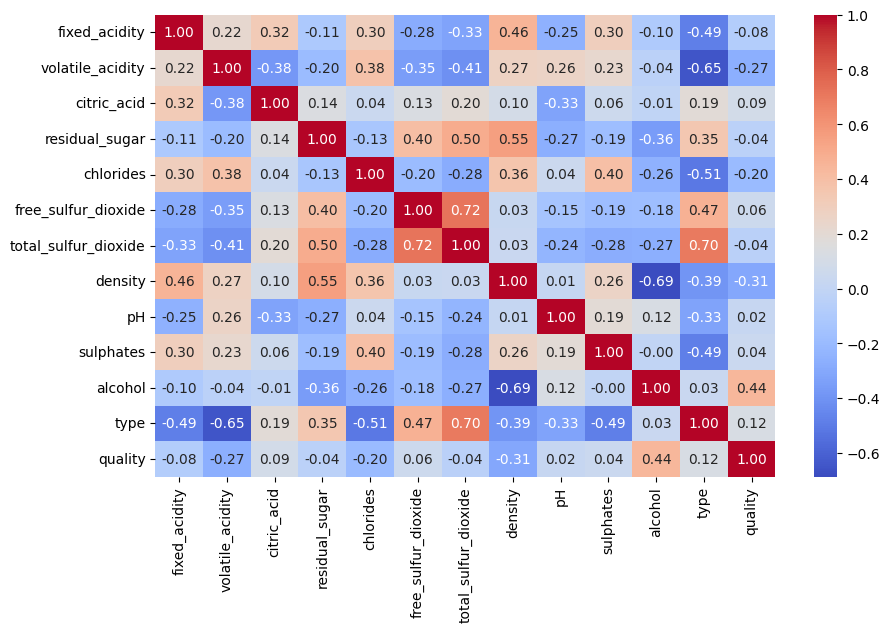

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(wines.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [11]:
#import necessary libraries and VIF function
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = wines.drop(columns=['quality'])
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#print sorted
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


                features          VIF
7                density  1159.930636
8                     pH   661.465549
10               alcohol   111.634942
0          fixed_acidity    71.390677
11                  type    20.656384
6   total_sulfur_dioxide    20.527867
9              sulphates    20.095312
1       volatile_acidity    11.258133
2            citric_acid     9.388837
5    free_sulfur_dioxide     8.720363
4              chlorides     5.850072
3         residual_sugar     3.576180


In [12]:
wines_drop = wines.drop(columns=['density','pH','alcohol','fixed_acidity','total_sulfur_dioxide','sulphates'])
vif1 = pd.DataFrame()
vif1['features'] = wines_drop.drop(columns=['quality']).columns
vif1['VIF'] = [variance_inflation_factor(wines_drop.drop(columns=['quality']).values, i) for i in range(wines_drop.drop(columns=['quality']).shape[1])]
print(vif1.sort_values(by='VIF', ascending=False))

              features       VIF
5                 type  5.555251
4  free_sulfur_dioxide  5.423777
1          citric_acid  5.416670
3            chlorides  4.594373
0     volatile_acidity  4.079225
2       residual_sugar  2.899923


In [13]:
#train lỉnear
import sklearn
from sklearn.model_selection import train_test_split
X = wines_drop[
    ['type',
     'free_sulfur_dioxide',
     'citric_acid',
     'chlorides',
     'volatile_acidity',
     'residual_sugar']
]

y = wines['quality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

import pandas as pd
coeff = pd.Series(lr.coef_, index=X.columns).sort_values()
print(coeff)


Mean Squared Error: 0.6587268648549063
R^2 Score: 0.1080769513735661
chlorides             -4.112339
volatile_acidity      -1.645973
type                  -0.322617
residual_sugar        -0.013669
free_sulfur_dioxide    0.001077
citric_acid            0.091829
dtype: float64


## Exercise 2.2  
### Titanic passengers data – 1310 observations and 15 variables

**Variables description:**

- **passenger_id** – Unique passenger id  
- **pclass** – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- **survived** – Survival (0 = No, 1 = Yes)  
- **name** – Name and Surname  
- **sex** – Sex (0 = Male, 1 = Female)  
- **age** – Age in years  
- **sibsp** – Number of siblings / spouses aboard the Titanic  
- **parch** – Number of parents / children aboard the Titanic  
- **ticket** – Ticket number  
- **fare** – Passenger fare  
- **cabin** – Cabin number  
- **embarked** – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **boat** – Lifeboat (if survived)  
- **body** – Body number (if not survived and body was recovered)  
- **home.dest** – Home/Destination  

### Objective
Estimate a **logistic regression model** to explain the probability of survival  
(\( \text{survived} = 1 \)).


In [14]:
titanic = pd.read_csv("data/titanic.csv")
pd.set_option('display.max_columns', 50)
titanic.head()

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
titanic['cabin'].value_counts()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F4                 4
                  ..
F E46              1
F E57              1
F E69              1
E10                1
F38                1
Name: count, Length: 186, dtype: int64

In [16]:
# có thể thấy cabin có nhiều giá trị thiếu nên ta sẽ loại bỏ cột này
titanic = titanic.drop(columns='cabin')

In [17]:
titanic['body'].isnull().sum()

np.int64(1188)

In [18]:
#sum of rows
titanic.shape[0]

1309

In [19]:
#missing 1118 trên tổng số 1309 ~ 85% dữ liệu bị thiếu ở cột body nên ta sẽ loại bỏ cột này
titanic = titanic.drop(columns='body')

In [20]:
titanic = titanic.drop(columns=['name', 'ticket', 'home.dest'])

In [21]:
titanic.isnull().sum()


passenger_id      0
pclass            0
survived          0
sex               0
age             263
sibsp             0
parch             0
fare              1
embarked          2
boat            823
dtype: int64

In [22]:
#có thể thấy cột age có thể dự đoán được nên fillna bằng median
titanic['age']= titanic['age'].fillna(titanic['age'].median())

In [23]:
titanic['boat'].isnull().sum()
titanic = titanic.drop(columns='boat')


In [24]:
titanic['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [25]:
#one hot encoding embraked
titanic = pd.get_dummies(
    titanic,
    columns=['embarked'],
    prefix='embarked',
    drop_first=True
)

pd.set_option('display.max_columns', 50)
titanic.head()

,passenger_id,pclass,survived,sex,age,sibsp,parch,fare,embarked_Q,embarked_S
0,1,1,1,1,29.0000,0,0,211.3375,False,True
1,2,1,1,0,0.9167,1,2,151.5500,False,True
2,3,1,0,1,2.0000,1,2,151.5500,False,True
3,4,1,0,0,30.0000,1,2,151.5500,False,True
4,5,1,0,1,25.0000,1,2,151.5500,False,True


In [26]:
X = titanic.drop(columns=['survived', 'passenger_id'])
X['embarked_Q'] = X['embarked_Q'].astype(int)
X['embarked_S'] = X['embarked_S'].astype(int)
X = X.select_dtypes(include=['int64', 'float64'])
X = X.dropna()



In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif = vif.sort_values(by='VIF', ascending=False)
print(vif)


      feature       VIF
0      pclass  5.765223
2         age  4.456529
7  embarked_S  4.397898
5        fare  1.846393
6  embarked_Q  1.657330
1         sex  1.639733
4       parch  1.524360
3       sibsp  1.504698


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y = titanic.loc[X.index, 'survived']
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coef = pd.Series(lin_model.coef_, index=X.columns).sort_values()
print(coef.sort_values(ascending=False))


Mean Squared Error: 0.15187610142035649
R^2 Score: 0.3695341614720036
sex           0.516092
fare          0.000310
age          -0.004659
parch        -0.016237
sibsp        -0.033492
embarked_Q   -0.086259
embarked_S   -0.110796
pclass       -0.128021
dtype: float64


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

y = titanic.loc[X.index, 'survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Mean Squared Error: 0.2366412213740458
R^2 Score: 0.017658442186744172
Accuracy: 0.7633587786259542
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       156
           1       0.74      0.63      0.68       106

    accuracy                           0.76       262
   macro avg       0.76      0.74      0.75       262
weighted avg       0.76      0.76      0.76       262



CÓ THỂ THẤY, LOG TRONG TRƯỜNG TITANIC SẼ HIỆU QUẢ HƠN

### Exercise 2.3.
Wine Quality Data Set: "data/wines.csv"

estimate the multinomial logistic regression model with 
the quality evaluation as the dependent variable,
treating the explained variable as qualitative.